In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from feature_selection import feature_selection
plt.style.use('fivethirtyeight')
%matplotlib inline

# Lab1

In [2]:
df_hitters = pd.read_csv('Data/Hitters.csv')
df_hitters = df_hitters.iloc[:,1:]
display(df_hitters.shape)
display(df_hitters.head())
df_hitters_to_work = df_hitters.copy()


(322, 20)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


## Data Manipulation

In [3]:
df_hitters_to_work = df_hitters.copy()
df_hitters_to_work.dropna(inplace= True)
display(df_hitters_to_work.info())

y = df_hitters_to_work.Salary

df_hitters_to_work.drop(['Salary'],axis = 1, inplace= True) 
numeric_features = list(df_hitters_to_work.dtypes[df_hitters_to_work.dtypes != 'object'].index)
#scaler = StandardScaler()
#df_hitters_to_work.loc[:,numeric_features] = scaler.fit_transform(df_hitters_to_work.loc[:,numeric_features])
X= pd.get_dummies(df_hitters_to_work)
X.drop(['League_A','Division_E','NewLeague_A'],axis=1,inplace= True)
features = list(X.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

None

<AxesSubplot:>

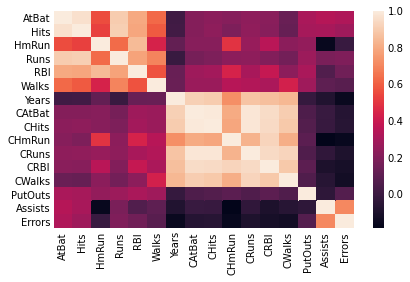

In [4]:
sns.heatmap(X.loc[:,numeric_features].corr())

In [5]:
feature_select = feature_selection(X,y)
result_dict = feature_select.best_subset_selection(num_features=3)
result_dict = feature_select.select_best_model()

Done for 0 features


In [6]:
df_results = pd.DataFrame(result_dict).T
df_results

,feature,mse,r2,aic,bic,adjusted_r2,params
0,(),202734.269158,0,0,0,0,NaN
1,"(CRBI,)",17139433.533604,0.32145,3862.139307,3869.283615,0.31885,const 274.580386 CRBI 0.790954 dtype:...
2,"(Hits, CRBI)",11336276.449136,0.425224,3820.487305,3831.203767,0.420802,const -47.955902 Hits 3.300845 CRBI ...
3,"(Hits, CRBI, PutOuts)",8023271.977593,0.451429,3810.21444,3824.503056,0.445075,const -71.459220 Hits 2.803816 CRBI...


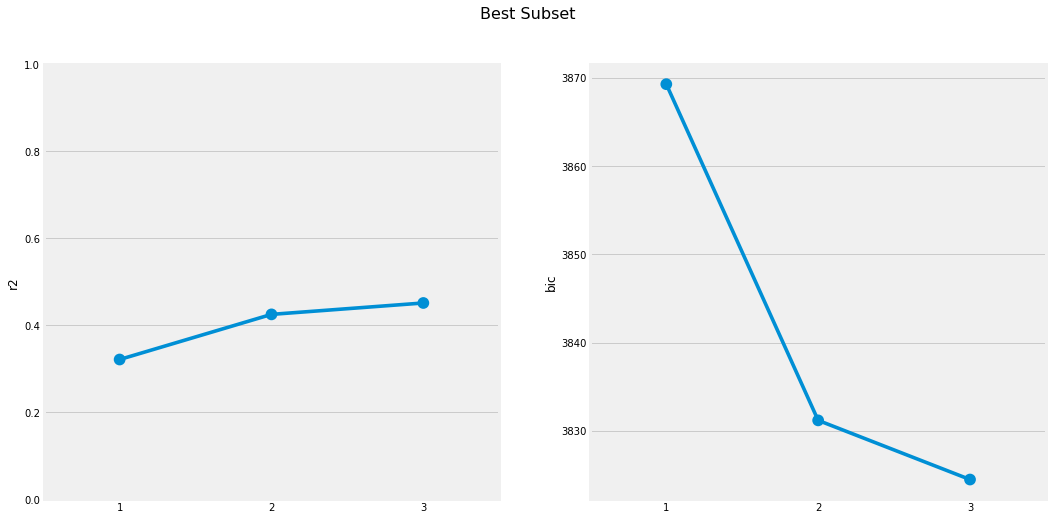

In [7]:
fig,axs = plt.subplots(1,2,figsize = (16,8))
fig.suptitle('Best Subset', fontsize=16)
sns.pointplot(x= df_results.index[1:].values, y=df_results.r2[1:],ax= axs[0],scale = 0.5)
axs[0].set_ylim([0,1])
sns.pointplot(x= df_results.index[1:].values, y=df_results.bic[1:],ax= axs[1],scale = 0.5)

plt.show()

In [8]:
feature_select = feature_selection(X,y)
result_dict = feature_select.forward_stepwise_selection(num_features=8)
# result_dict = feature_select.select_best_model()
# # df_results = pd.DataFrame(result_dict).T
# # df_results

test


AttributeError: 'tuple' object has no attribute 'append'

In [ ]:
feature_select.forward_stepwise_result_dict

In [ ]:
t= list(feature_select.forward_stepwise_result_dict[0]['feature'])
t.append('CRBI')